In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(y):
    return -100 * y

In [3]:
c = 1 # initial condition

In [4]:
def F_exact(t, c):
    return c * np.exp(-100 * t)

In [5]:
t0 = 0.01
tmax = 0.1
N = 4
h = (tmax - t0) / N
t = np.arange(0.01, 0.1 + h, h)
y_euler = np.zeros(N+1)
y_euler[0] = c # Initial value
for j in range(N):
    y_euler[j+1] = y_euler[j] + h * f(y_euler[j])

In [6]:
y_exact = [F_exact(t[i], c) for i in range(len(t))]

In [7]:
y_rk = np.zeros(N+1)
y_rk[0] = c

for j in range(N):  
    k1 = f(y_rk[j])
    k2 = f(y_rk[j] + h/2.0 * k1)
    k3 = f(y_rk[j] + h/2.0 * k2)
    k4 = f(y_rk[j] + h   * k3)
    
    y_rk[j+1] = y_rk[j] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

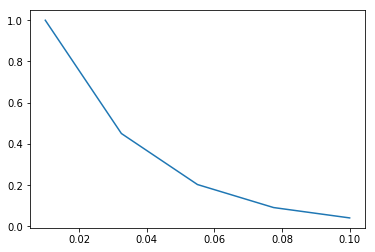

In [8]:
plt.plot(t, y_rk)

In [9]:
# Explicit Euler
# Local discretization error dj
y_euler_using_exact_starting_values = np.zeros(N+1)
for j in range(N):
    y_euler_using_exact_starting_values[j+1] = y_exact[j] + h * f(y_exact[j])    
dj = abs(y_euler_using_exact_starting_values - y_exact)

# Global discretization error Dj
Dj = abs(y_euler - y_exact)

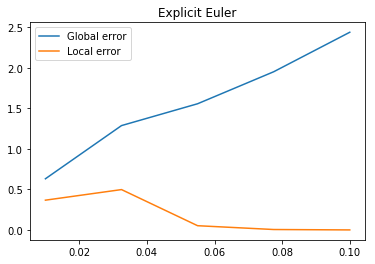

In [10]:
plt.title("Explicit Euler")
plt.plot(t, Dj)
plt.plot(t, dj)
plt.legend(["Global error", "Local error"])
None

In [11]:
# Explicit Euler
# Local discretization error dj
y_rk4_using_exact_starting_values = np.zeros(N+1)
for j in range(N):
    k1 = f(y_exact[j]) 
    k2 = f(y_exact[j] + h/2.0 * k1)
    k3 = f(y_exact[j] + h/2.0 * k2)
    k4 = f(y_exact[j] + h   * k3)
    
    y_rk[j+1] = y_exact[j] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

dj_rk4 = abs(y_rk4_using_exact_starting_values - y_exact)

# Global discretization error Dj
Dj_rk4 = abs(y_rk - y_exact)

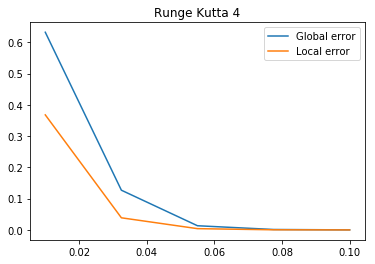

In [12]:
plt.title("Runge Kutta 4")
plt.plot(t, Dj_rk4)
plt.plot(t, dj_rk4)
plt.legend(["Global error", "Local error"])
None